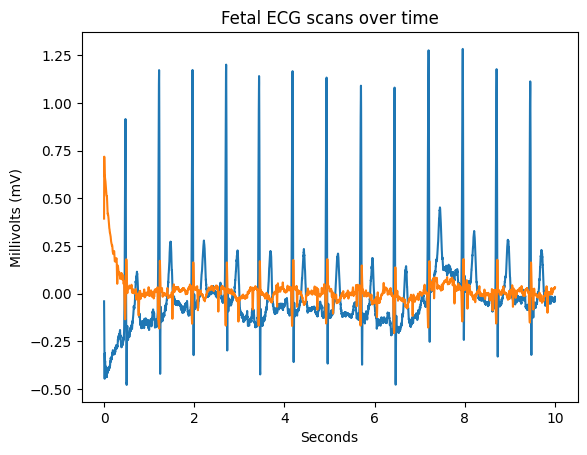

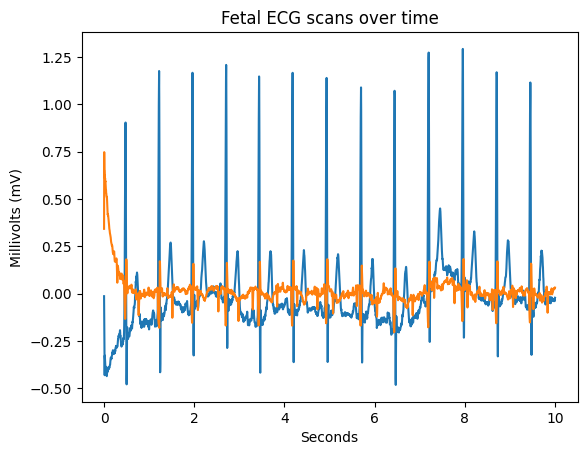

       ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
0     0.273977  -0.032621  80.237741     0.565512            0            0   
1     0.225807  -0.067593  80.237741     0.565512            0            0   
2     0.181719  -0.100294  80.237741     0.565512            0            0   
3     0.136213  -0.127192  80.237741     0.565512            0            0   
4     0.103949  -0.146892  80.237741     0.565512            0            0   
...        ...        ...        ...          ...          ...          ...   
2995  0.267278  -0.009683  80.717489     0.000000            0            0   
2996  0.267886  -0.008757  80.717489     0.000000            0            0   
2997  0.263404  -0.007767  80.717489     0.000000            0            0   
2998  0.269919  -0.006442  80.717489     0.000000            0            0   
2999  0.270698  -0.005137  80.717489     0.000000            0            0   

      ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  ECG

<Figure size 640x480 with 0 Axes>

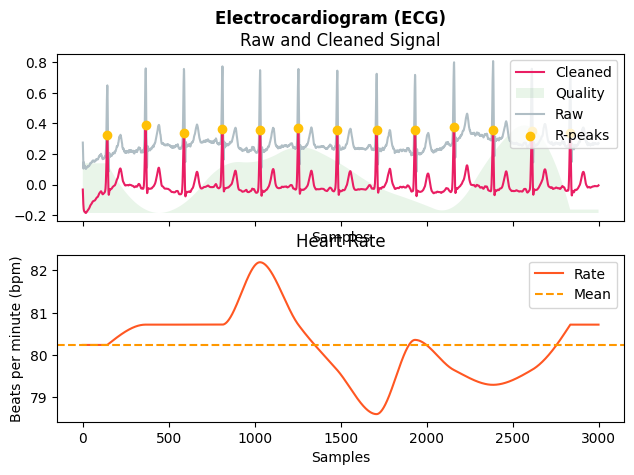

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import wfdb
import numpy as np
import scipy.signal
from scipy.signal import find_peaks 
from scipy import signal
import neurokit2 as nk

def neuro_kit(signal,sampling_rate):
    processed_sig, _ = nk.ecg_process(signal,sampling_rate, method='neurokit')
    print(processed_sig)
    nk.ecg_plot(processed_sig)


def resample(data,fs, new_fs):
    
    current_frequency = fs
    nyquist_frequency = new_fs
    
    frequency_ratio = nyquist_frequency/current_frequency
    total_resampled_samples = int(len(data)*(frequency_ratio))

    sampled_data = signal.resample(data, total_resampled_samples)
    
    return sampled_data


def normalize(data):

    minimum = np.min(data)
    maximum = np.max(data)
    data  = (data - minimum)/(maximum-minimum)
    return data

def plot_signal(data, fs, seconds, signal_count):
    
    plt.title("Fetal ECG scans over time")
    plt.xlabel("Seconds")
    plt.ylabel("Millivolts (mV)")

    x = np.arange(0, len(data))/fs
    plt.plot(x[0:seconds*fs], data[0:seconds*fs,0:signal_count])

    plt.show()
    plt.figure()

records_file_path = 'non-invasive-fetal-ecg-arrhythmia-database-1.0.0/RECORDS'
with open(records_file_path, 'r') as f:
    record_names = f.read().splitlines()


for record_name in record_names:
    record_path = 'non-invasive-fetal-ecg-arrhythmia-database-1.0.0/' + record_name
    record = wfdb.rdrecord(record_path)
    signals = record.p_signal
    fs = record.fs

    # sample, normalize, plot 1
    new_fs = 300
    sampled_data = resample(signals,fs, new_fs)
    normalized_data = normalize(sampled_data)

    # print 
    plot_signal(signals, fs=fs, seconds=10, signal_count=2)
    plot_signal(sampled_data, fs=new_fs, seconds=10, signal_count=2)

    # feature extraction of first signal only
    neuro_kit(normalized_data[0:new_fs*10,0], new_fs)

    break

    
    
    
    
    



    